# Crop price recommender system

In [1]:
# IMPORTING FILES
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath
from matplotlib import pyplot as plt

In [2]:
# IN-HOUSE FUNCTION: RETURN DIRECTORY SPECIFIC TO RUNNING OS
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# VARIABLES
HARGAPANGAN_LOCATION = get_directory('./dataset/time-series')
TRAIN_SPLIT = 0.8
WINDOW_SIZE = 20
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

# TEST
print(HARGAPANGAN_LOCATION)

dataset\time-series


For the following code block, we are getting all the data from four excel files (trust me, the data is spread horizontally and I don't wanna mess too much)

In [4]:
_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')
_hp_20_21.columns = _hp_20_21.iloc[0]
_hp_20_21 = _hp_20_21.drop(_hp_20_21.index[0])
_hp_19_20 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2019 to 2020.xlsx'), skiprows=8).transpose().drop('No.')
_hp_19_20.columns = _hp_19_20.iloc[0]
_hp_19_20 = _hp_19_20.drop(_hp_19_20.index[0])
_hp_18_19 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2018 to 2019.xlsx'), skiprows=8).transpose().drop('No.')
_hp_18_19.columns = _hp_18_19.iloc[0]
_hp_18_19 = _hp_18_19.drop(_hp_18_19.index[0])
_hp_17_18 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2017 to 2018.xlsx'), skiprows=8).transpose().drop('No.')
_hp_17_18.columns = _hp_17_18.iloc[0]
_hp_17_18 = _hp_17_18.drop(_hp_17_18.index[0])
#_hp_20_21 = pd.read_excel(get_directory(HARGAPANGAN_LOCATION + '/Harga Pangan - 2020 to 2021.xlsx'), skiprows=8).transpose().drop('No.')

In [5]:
_hp_17_18

Komoditas(Rp),Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Daging Ayam,Daging Ayam Ras Segar (kg),Daging Sapi,...,Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg),Minyak Goreng,Minyak Goreng Curah (kg),Minyak Goreng Kemasan Bermerk 1 (kg),Minyak Goreng Kemasan Bermerk 2 (kg),Gula Pasir,Gula Pasir Kualitas Premium (kg),Gula Pasir Lokal (kg)
31/07/2017,10900,9950,9450,11000,10850,12450,11850,32500,32500,115350,...,35700,29300,44300,13650,11750,14750,14150,14600,16400,13050
01/08/2017,10950,9900,9450,11050,10850,12450,11850,32650,32650,115000,...,35950,29950,44150,13650,11750,14750,14150,14600,16400,13050
02/08/2017,10950,9900,9450,11000,10800,12450,11850,32650,32650,114950,...,35600,29850,43400,13650,11750,14750,14150,14600,16450,13050
03/08/2017,10950,9900,9450,11050,10850,12450,11850,32800,32800,115100,...,35700,30100,43250,13650,11750,14750,14150,14600,16400,13050
04/08/2017,11000,9900,9750,11050,10850,12450,11850,32950,32950,114850,...,35600,30050,43200,13650,11750,14750,14150,14600,16400,13050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/05/2018,11500,10450,10050,11650,11400,12900,12450,33850,33850,115100,...,31900,29300,35300,13350,11650,14450,13800,13700,15350,12350
07/05/2018,11500,10450,10050,11650,11400,12900,12450,34350,34350,114850,...,31550,29500,34350,13400,11650,14450,13800,13700,15350,12350
08/05/2018,11500,10450,10050,11650,11400,12900,12450,34550,34550,115250,...,31450,29300,34250,13400,11650,14450,13800,13700,15350,12350
09/05/2018,11500,10450,10050,11650,11400,12900,12450,34700,34700,115300,...,31550,29250,34500,13400,11650,14450,13800,13700,15350,12350


In [6]:
# Creating the master dataset
HARGA_PANGAN = pd.concat([_hp_17_18, _hp_18_19, _hp_19_20, _hp_20_21], ignore_index=False).dropna()

In [7]:
HARGA_PANGAN_BERAS = np.delete(HARGA_PANGAN['Beras'].values, 0).astype(int)

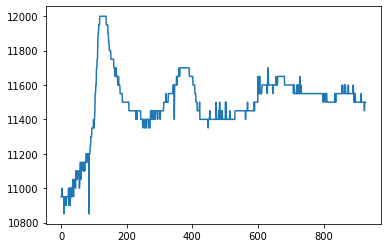

In [8]:
# Here is the time series for the average rice value in Indonesia

plt.plot(range(len(HARGA_PANGAN_BERAS)), HARGA_PANGAN_BERAS)
plt.show()

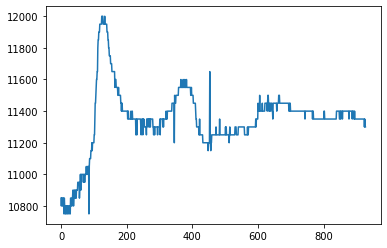

In [9]:
# Harga Beras Medium - Beras Kualitas Medium II (kg)
BERAS_MEDIUM = np.delete(HARGA_PANGAN['Beras Kualitas Medium II (kg)'].values, 0).astype(int)
plt.plot(range(len(BERAS_MEDIUM)), BERAS_MEDIUM)
plt.show()

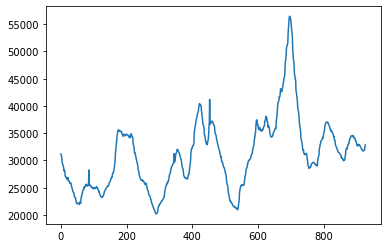

In [10]:
# Harga Bawang Merah
BAWANG_MERAH = np.delete(HARGA_PANGAN['Bawang Merah'].values, 0).astype(int)
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH)
plt.show()

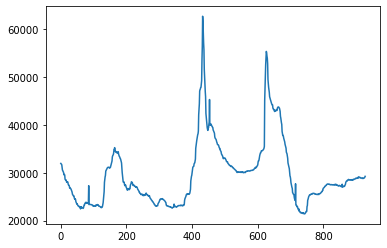

In [11]:
# Harga Bawang Putih
BAWANG_PUTIH = np.delete(HARGA_PANGAN['Bawang Putih'].values, 0).astype(int)
plt.plot(range(len(BAWANG_PUTIH)), BAWANG_PUTIH)
plt.show()

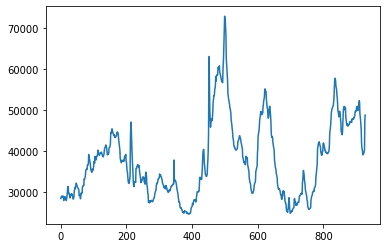

In [12]:
# Harga Cabai Merah
CABAI_MERAH = np.delete(HARGA_PANGAN['Cabai Merah'].values, 0).astype(int)
plt.plot(range(len(CABAI_MERAH)), CABAI_MERAH)
plt.show()

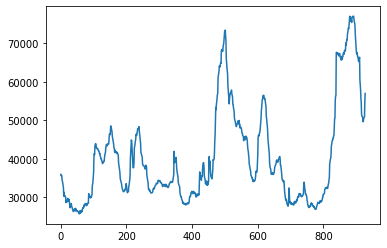

In [13]:
# Harga Cabai Rawit
CABAI_RAWIT = np.delete(HARGA_PANGAN['Cabai Rawit'].values, 0).astype(int)
plt.plot(range(len(CABAI_RAWIT)), CABAI_RAWIT)
plt.show()

Verdict: we will be using bawang merah.

## Data preparation - for machine learning model

In [14]:
# Data normalisation
BAWANG_MERAH = BAWANG_MERAH / 50000

In [15]:
# Train-test split
_count = len(BAWANG_MERAH)
BAWANG_MERAH_TRAIN = BAWANG_MERAH[:int(_count*TRAIN_SPLIT)]
BAWANG_MERAH_TEST = BAWANG_MERAH[int(_count*TRAIN_SPLIT):]

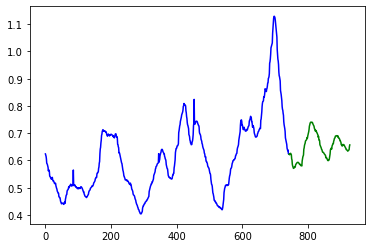

In [16]:
# Visualize the difference between train and test
plt.plot(range(int(_count * TRAIN_SPLIT)), BAWANG_MERAH_TRAIN, 'b', range(int(_count * TRAIN_SPLIT), _count), BAWANG_MERAH_TEST, 'g')
plt.show()

In [17]:
# Nyomot dari Mr. Moroney ya yang ini :)
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [46]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

tf.keras.backend.clear_session()
_input = windowed_dataset(BAWANG_MERAH_TRAIN, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER_SIZE)

bawang_merah_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-1 * 10**(epoch / 20)
)

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1, momentum = 0.9)
bawang_merah_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['mae']
)

history_opt = bawang_merah_pred.fit(
    _input,
    epochs = 15,
    callbacks = [learning_rate_scheduler]
)

Epoch 1/15
23/23 [==============================] - 7s 17ms/step - loss: 0.0658 - mae: 0.2975
Epoch 2/15
23/23 [==============================] - 0s 16ms/step - loss: 0.0132 - mae: 0.1259
Epoch 3/15
23/23 [==============================] - 0s 16ms/step - loss: 0.0065 - mae: 0.0882
Epoch 4/15
23/23 [==============================] - 0s 17ms/step - loss: 0.0018 - mae: 0.0472
Epoch 5/15
23/23 [==============================] - 0s 16ms/step - loss: 0.0014 - mae: 0.0411
Epoch 6/15
23/23 [==============================] - 0s 16ms/step - loss: 0.0019 - mae: 0.0493
Epoch 7/15
23/23 [==============================] - 0s 17ms/step - loss: 0.0013 - mae: 0.0393
Epoch 8/15
23/23 [==============================] - 0s 17ms/step - loss: 0.0011 - mae: 0.0376
Epoch 9/15
23/23 [==============================] - 0s 17ms/step - loss: 8.7878e-04 - mae: 0.0334
Epoch 10/15
23/23 [==============================] - 0s 17ms/step - loss: 9.8763e-04 - mae: 0.0363
Epoch 11/15
23/23 [==============================] 

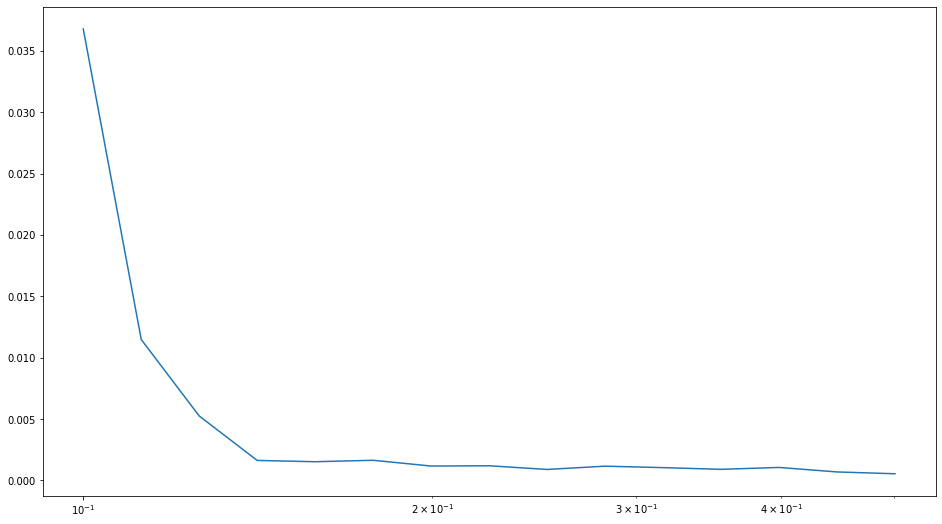

In [47]:
plt.figure(figsize=(16,9))
plt.semilogx(history_opt.history['lr'], history_opt.history['loss'])
plt.show()

Verdict: we get 1e-1 as our learning rate.

In [48]:
tf.keras.backend.clear_session()

bawang_merah_pred = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-1, momentum = 0.9)
bawang_merah_pred.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = optimizer,
    metrics = ['mae']
)

history = bawang_merah_pred.fit(
    _input,
    epochs = 500,
)

7
Epoch 303/500
23/23 [==============================] - 0s 16ms/step - loss: 9.9295e-05 - mae: 0.0100
Epoch 304/500
23/23 [==============================] - 0s 15ms/step - loss: 8.5578e-05 - mae: 0.0095
Epoch 305/500
23/23 [==============================] - 0s 17ms/step - loss: 1.2082e-04 - mae: 0.0113
Epoch 306/500
23/23 [==============================] - 0s 16ms/step - loss: 6.1251e-05 - mae: 0.0078
Epoch 307/500
23/23 [==============================] - 0s 16ms/step - loss: 6.3615e-05 - mae: 0.0082
Epoch 308/500
23/23 [==============================] - 0s 16ms/step - loss: 9.2339e-05 - mae: 0.0094
Epoch 309/500
23/23 [==============================] - 0s 18ms/step - loss: 8.6187e-05 - mae: 0.0086
Epoch 310/500
23/23 [==============================] - 0s 17ms/step - loss: 7.0010e-05 - mae: 0.0080
Epoch 311/500
23/23 [==============================] - 0s 17ms/step - loss: 7.7400e-05 - mae: 0.0091
Epoch 312/500
23/23 [==============================] - 0s 18ms/step - loss: 8.4003e-05 - 

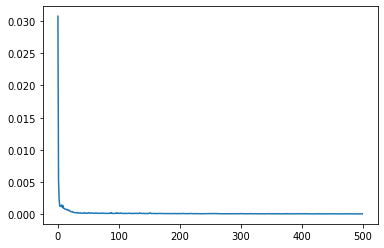

In [49]:
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.show()

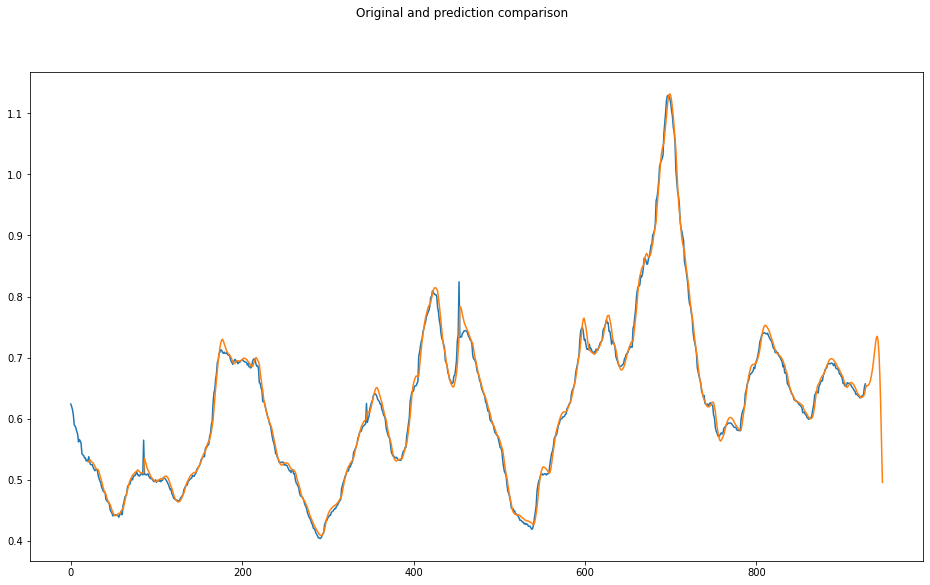

In [54]:
forecast = []
results = []
for i in range(len(BAWANG_MERAH)):
    forecast.append(bawang_merah_pred.predict(BAWANG_MERAH[i:i + WINDOW_SIZE][np.newaxis]))

results = np.array(forecast)[:, 0, 0]

fig = plt.figure(figsize=(16,9))
plt.suptitle('Original and prediction comparison')
plt.plot(range(len(BAWANG_MERAH)), BAWANG_MERAH)
plt.plot(range(WINDOW_SIZE, len(results) + WINDOW_SIZE), results)
plt.show()

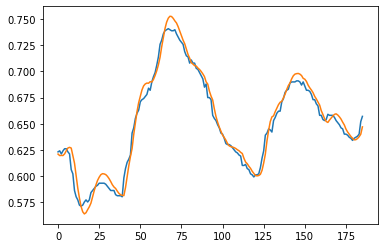

In [57]:
# FOCUS ON TEST
plt.plot(range(len(BAWANG_MERAH_TEST)), BAWANG_MERAH_TEST)
plt.plot(range(len(BAWANG_MERAH_TEST)), results[int(TRAIN_SPLIT * _count) - WINDOW_SIZE:_count - WINDOW_SIZE])